In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [5]:
df.shape

(5000, 7)

In [6]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Looking at the "order_amount" column, we can see that the mean is 3145 which is given as the average order value. I am sensing that it is because of the outliers which are draging the mean towards the higher values. Also a high standard deviation of 41282 indicates that how much the value is spread out. Let us have a closer look at the outliers present in the sample.   

#Finding out the outliers 

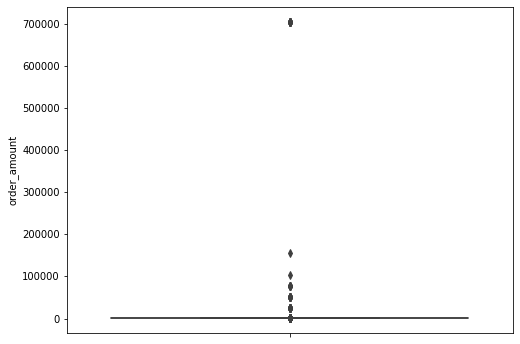

In [6]:
fig, ax=plt.subplots(figsize=(8,6))
sns.boxplot(y=df['order_amount'],ax=ax)

In [64]:
df.groupby(['order_amount']).size().reset_index().sort_values(by='order_amount', ascending=False).head(20)

,order_amount,0
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


In [74]:
df_inter=df[df['order_amount'].isin(['25725','51450','704000','77175'])].sort_values(by='order_amount', ascending=False)

In [78]:
df_inter.head(60)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00



#Standard deviation Method

If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers. There is a range of techniques to check if the data sample deviates from a Gaussian distribution. Lets start by first using a visual normality where we create a histogram of our data.

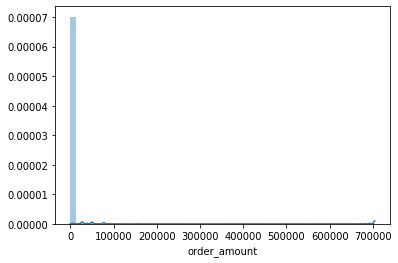

In [87]:
sns.distplot(df['order_amount'], kde=True)

Clearly from the plot we can see that the shape of the data is not Gaussian-like(bell shaped).Thus we wont be able to use the standard deviation as our tool to chech the outliers. Hence we resort to the method of Interquartile range for our non-Gaussian distribution.

The IQR is calculated as the difference between the 75th and 25th percentile of the data and defines the box in a box and whisker plot.

In [27]:
from numpy import percentile

In [28]:
q25, q75 =percentile(df['order_amount'], 25), percentile(df['order_amount'], 75)
iqr=q75-q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=163.000, 75th=390.000, IQR=227.000


In [29]:
# calculate outlier cutoff
cut_off=iqr*1.5
lower, upper= q25 - cut_off, q75 + cut_off


In [30]:
#identify outliers
outliers=[x for x in df['order_amount'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 141


In [31]:
outliers_removed = [x for x in df['order_amount'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 4859


In [ ]:
outliers_removed

We have succesfully removed the outliers and after that our Average Order Value comes out to 293.71 which is in the range of acceptable values with a standard deviation of 144.43

In [32]:

print('New Average order after removing outliers :{0}'.format(mean(outliers_removed)))

New Average order after removing outliers :293.7153735336489


In [33]:

print('New Standard deviation after removing outliers :{0}'.format(std(outliers_removed)))
#std(outliers_removed)

New Standard deviation after removing outliers :144.43852968691678


# Second Question-SQL

#1st Question

SELECT COUNT(*)
FROM Orders as O
INNER JOIN Shippers as S
ON O.ShipperID=S.ShipperID
WHERE O.ShipperID=1

Using the above query, the output shows the number of orders is 54.

#2nd Question

SELECT E.LastName, COUNT(O.OrderID) AS NumberOfOrders
FROM Employees as E
INNER JOIN Orders as O
ON E.EmployeeID=O.EmployeeID
GROUP BY O.EmployeeID
ORDER BY NumberOfOrders DESC
LIMIT 1


Using the query above shows that the employee with the last name Peacock had the most orders at 40.

Boston Crab Meat has the most orders in Germany at total 160 orders. 